In [25]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix,classification_report
hd=pd.read_csv('heart disease.csv')

In [26]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [27]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# histograms for all the features present in the dataset 


<IPython.core.display.Javascript object>


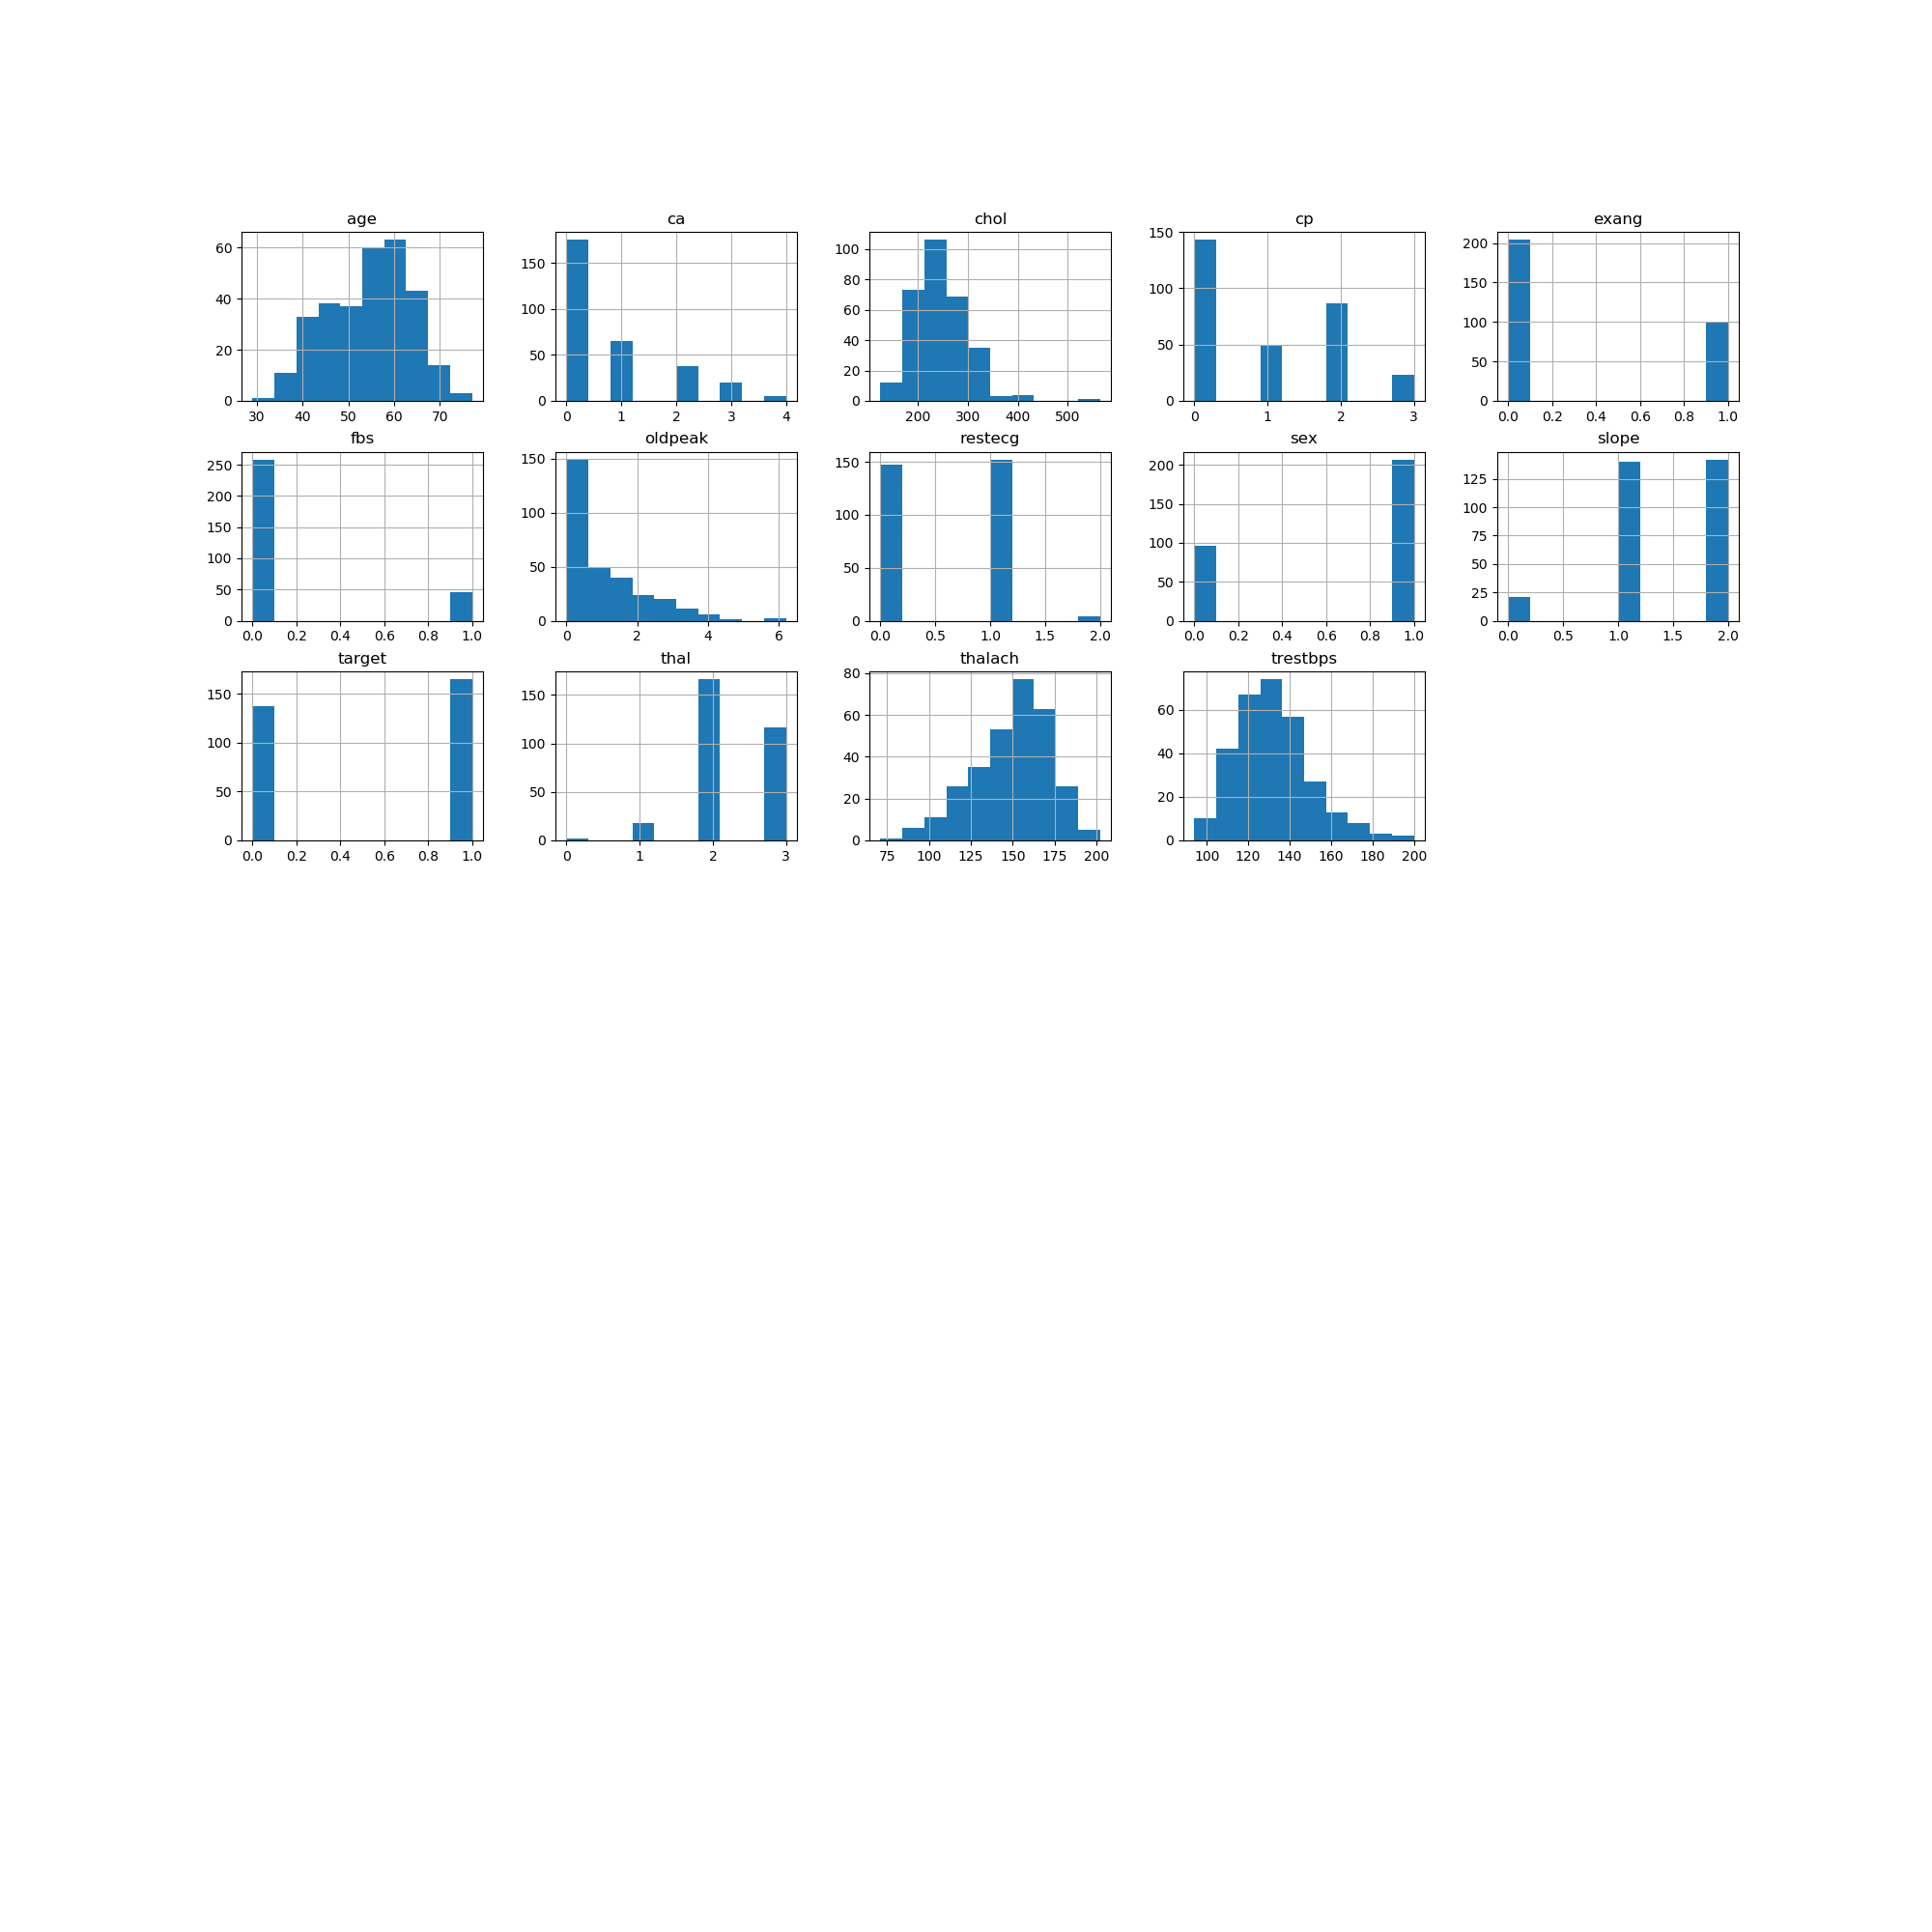

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D90004F608>,
      dtype=object)

In [28]:
hd.hist(bins=10,layout=(7,5),figsize=(20,20))

# size of each class in terms of numeric values and bar graph representation

In [29]:
print("size of the each class")
hd.target.value_counts()

size of the each class


1    165
0    138
Name: target, dtype: int64

In [30]:
#### This ia a balanced dataset.

<IPython.core.display.Javascript object>


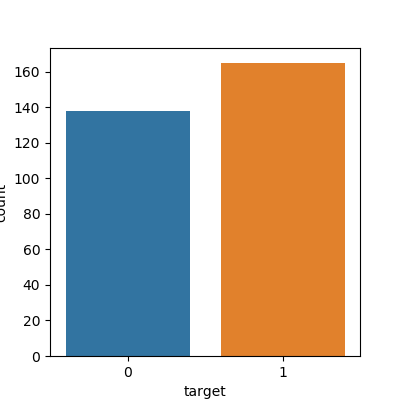

In [31]:
plt.figure(figsize=(4,4))
sns.countplot(x='target',data=hd,)
plt.show()

In [121]:
hd.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

<IPython.core.display.Javascript object>


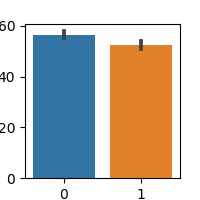

In [32]:
plt.figure(figsize=(2,2))
sns.barplot(x='target',y='age',data=hd)
plt.show()

<IPython.core.display.Javascript object>


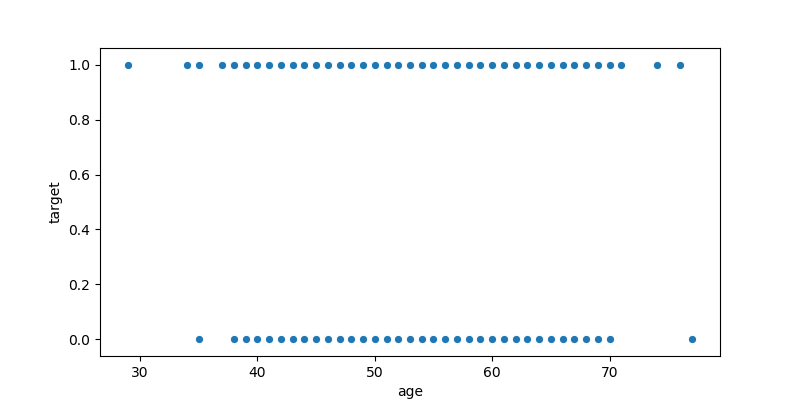

In [10]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='age',y='target',data=hd)
plt.show()

# Data preprocessing  using minmax scalar

In [33]:
from sklearn.preprocessing import MinMaxScaler
hd_matrix=hd['age'].values.reshape(-1,1)
mm=MinMaxScaler()
p=mm.fit_transform(hd_matrix)
hd['age']=p
hd_matrix=hd['cp'].values.reshape(-1,1)
p=mm.fit_transform(hd_matrix)
hd['cp']=p
hd_matrix=hd['trestbps'].values.reshape(-1,1)
p=mm.fit_transform(hd_matrix)
hd['trestbps']=p
hd_matrix=hd['chol'].values.reshape(-1,1)
p=mm.fit_transform(hd_matrix)
hd['chol']=p
hd_matrix=hd['restecg'].values.reshape(-1,1)
p=mm.fit_transform(hd_matrix)
hd['restecg']=p
hd_matrix=hd['restecg'].values.reshape(-1,1)
p=mm.fit_transform(hd_matrix)
hd['restecg']=p
hd_matrix=hd['oldpeak'].values.reshape(-1,1)
p=mm.fit_transform(hd_matrix)
hd['oldpeak']=p
hd_matrix=hd['thalach'].values.reshape(-1,1)
p=mm.fit_transform(hd_matrix)
hd['thalach']=p
hd_matrix=hd['slope'].values.reshape(-1,1)
p=mm.fit_transform(hd_matrix)
hd['slope']=p
hd_matrix=hd['thal'].values.reshape(-1,1)
p=mm.fit_transform(hd_matrix)
hd['thal']=p
hd_matrix=hd['ca'].values.reshape(-1,1)
p=mm.fit_transform(hd_matrix)
hd['ca']=p

##### dataset after minmaxscaling 

hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,1.000000,0.481132,0.244292,1,0.0,0.603053,0,0.370968,0.0,0.00,0.333333,1
1,0.166667,1,0.666667,0.339623,0.283105,0,0.5,0.885496,0,0.564516,0.0,0.00,0.666667,1
2,0.250000,0,0.333333,0.339623,0.178082,0,0.0,0.770992,0,0.225806,1.0,0.00,0.666667,1
3,0.562500,1,0.333333,0.245283,0.251142,0,0.5,0.816794,0,0.129032,1.0,0.00,0.666667,1
4,0.583333,0,0.000000,0.245283,0.520548,0,0.5,0.702290,1,0.096774,1.0,0.00,0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0,0.000000,0.433962,0.262557,0,0.5,0.396947,1,0.032258,0.5,0.00,1.000000,0
299,0.333333,1,1.000000,0.150943,0.315068,0,0.5,0.465649,0,0.193548,0.5,0.00,1.000000,0
300,0.812500,1,0.000000,0.471698,0.152968,1,0.5,0.534351,0,0.548387,0.5,0.50,1.000000,0
301,0.583333,1,0.000000,0.339623,0.011416,0,0.5,0.335878,1,0.193548,0.5,0.25,1.000000,0


#  correlation matrix

In [34]:
cor=hd.corr()
cor

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# Heat map 

<IPython.core.display.Javascript object>


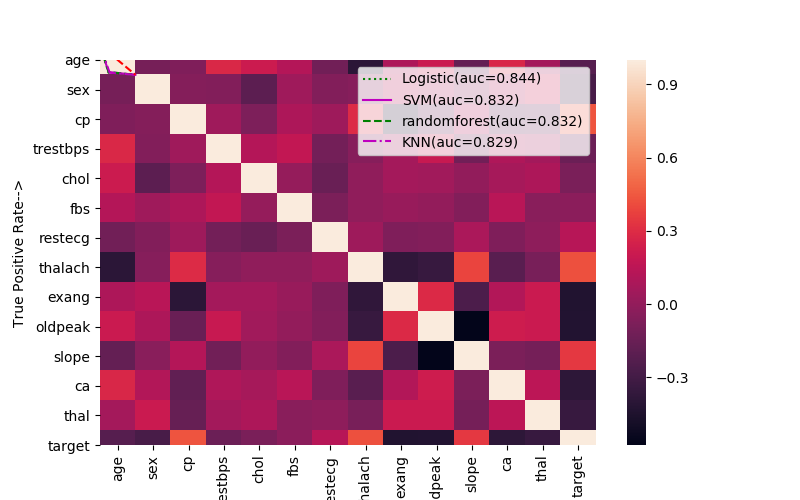

In [35]:
plt.figure(figsize=(8,5))
sns.heatmap(cor)
plt.show()


In [13]:
t=abs(cor['target'])
selected_feature=t[t>0.3]
selected_feature

cp         0.433798
thalach    0.421741
exang      0.436757
oldpeak    0.430696
slope      0.345877
ca         0.391724
thal       0.344029
target     1.000000
Name: target, dtype: float64

In [36]:
features=['cp','thalach','exang','oldpeak','slope','ca','thal']
x=hd[features]
y=hd.target

In [37]:
from sklearn.model_selection import train_test_split , GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 0)


# logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
p=LogisticRegression()
clf = p.fit(X_train, y_train)
pre=p.predict(X_test)
lr_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)
print(classification_report(y_test,pre))

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
print('Logistic regression classifier \n', confusion)

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.83      0.93      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.84      0.85        76
weighted avg       0.86      0.86      0.85        76

Accuracy of Logistic regression classifier on training set: 0.81
Accuracy of Logistic regression classifier on test set: 0.86
Logistic regression classifier 
 [[25  8]
 [ 3 40]]


C:\Users\tanuj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# k nearest neighbours

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

pre=knn.predict(X_test)
knn_predicted = knn.predict(X_test)
confusion = confusion_matrix(y_test, knn_predicted)
print(classification_report(y_test,pre))
print('Accuracy of knn classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of knn classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
print('k nearest neighbours classifier \n', confusion)

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        33
           1       0.82      0.93      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.83        76
weighted avg       0.85      0.84      0.84        76

Accuracy of knn classifier on training set: 0.84
Accuracy of knn classifier on test set: 0.84
k nearest neighbours classifier 
 [[24  9]
 [ 3 40]]


# random forests 

In [40]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 150, 200], 'min_samples_split': [60], 'min_samples_leaf': [10, 20, 25, 30, 35], 
              'max_features': ['auto'], 'max_depth': [5, 6, 7, 8], 'criterion': ['gini'], 'bootstrap': [False]}
random_forest_CV = GridSearchCV(estimator=random_forest, param_grid=param_grid,verbose=False)
random_forest_CV.fit(X_train,y_train)
rf_predicted = random_forest_CV.predict(X_test)
confusion = confusion_matrix(y_test, rf_predicted)
print(classification_report(y_test,pre))
print('Accuracy of knn classifier on training set: {:.2f}'
     .format(random_forest_CV.score(X_train, y_train)))
print('Accuracy of knn classifier on test set: {:.2f}'
     .format(random_forest_CV.score(X_test, y_test)))
print('random forest classifier \n', confusion)

C:\Users\tanuj\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


              precision    recall  f1-score   support

           0       0.89      0.73      0.80        33
           1       0.82      0.93      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.83        76
weighted avg       0.85      0.84      0.84        76

Accuracy of knn classifier on training set: 0.86
Accuracy of knn classifier on test set: 0.84
random forest classifier 
 [[25  8]
 [ 4 39]]


# support vector machine

In [41]:
from sklearn import svm
clf=svm.SVC(gamma=0.01,C=1,kernel='linear')
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
svm_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)
print(classification_report(y_test,pre))
print('Accuracy of svm classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of svm classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        33
           1       0.82      0.93      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.83        76
weighted avg       0.85      0.84      0.84        76

Accuracy of svm classifier on training set: 0.83
Accuracy of svm classifier on test set: 0.84
Support vector machine classifier (linear kernel, C=1)
 [[25  8]
 [ 4 39]]


# roc curve

<IPython.core.display.Javascript object>


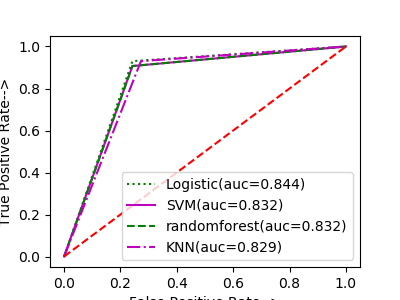

In [55]:
fpr, tpr, thresholds = roc_curve(y_test,lr_predicted) #logistic regression
auc_logistic=auc(fpr,tpr)

f,t,th=roc_curve(y_test,svm_predicted) #svm classifier
auc_svm=auc(f,t)

f_r,t_r,th_r=roc_curve(y_test,rf_predicted) #random forest classifier
auc_rf=auc(f_r,t_r)

f_k,t_k,th_k=roc_curve(y_test,knn_predicted) #knn classifier
auc_knn=auc(f_k,t_k)

plt.figure(figsize=(4,3))
plt.plot(fpr,tpr,color='g',linestyle=':',label='Logistic(auc=%0.3f)' % auc_logistic)
plt.plot(f,t,color='m',label='SVM(auc=%0.3f)' % auc_svm)
plt.plot(f_r,t_r,color='g',linestyle='--',label='randomforest(auc=%0.3f)' % auc_rf)
plt.plot(f_k,t_k,color='m',linestyle='dashdot',label='KNN(auc=%0.3f)' % auc_knn)
plt.plot([0,1],[0,1],'r--')
#plt.title('Roc Curve ')
plt.ylabel('True Positive Rate-->')
plt.xlabel('False Positive Rate-->')

plt.legend()
plt.show()